# Applied Machine Learning HomeWork 1
Due 09/29/21 11:59pm

## Task 1: Data Visualization and Analysis

You can download the FIFA 19 complete dataset from

https://www.kaggle.com/karangadiya/fifa19

Please replace the value of PATH_TO_DATASET variable in the following block with the path to your dataset

In [173]:
# import modules, read data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns


PATH_TO_DATASET = './data.csv' 
############################################################

df = pd.read_csv(PATH_TO_DATASET)
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### 1.1 

Create a **scatter plot** of the Age vs Overall Rating. **Ensure the axes are labeled
properly.**

Text(0.5, 1.0, 'Age vs Overall Rating FIFA 19')

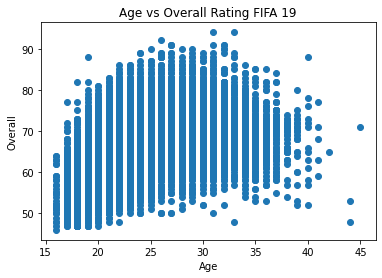

In [174]:
plt.figure()
plt.scatter(df.Age, df.Overall)
plt.xlabel(df.Age.name)
plt.ylabel(df.Overall.name)
plt.title("Age vs Overall Rating FIFA 19")

###1.2

Visualize the distribution of Overall Rating as a **histogram**. 

Do a small multiples plot of whether the player's prefered foot is left, i.e. do **one plot** of Overall Rating distribution for those players prefered left foot and **a separate** for those who prefer right foot (**within the same figure on separate axes**). **Ensure the axes are labeled properly and titles are added.**

[Text(0.5, 0, 'Overall'),
 Text(0, 0.5, '# Of Players'),
 Text(0.5, 1.0, 'Overall Rating Distribution for Right Footed Players')]

<Figure size 432x288 with 0 Axes>

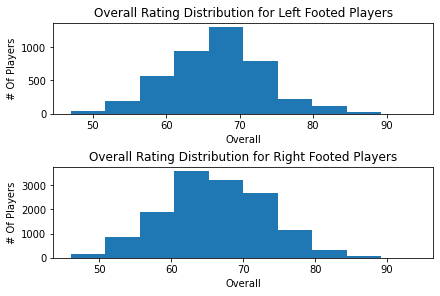

In [175]:
plt.figure()
fig, (ax1, ax2) = plt.subplots(2, constrained_layout=True)
df_left = df[df['Preferred Foot'] == 'Left']
df_right = df[df['Preferred Foot'] == 'Right']
ax1.hist(df_left.Overall)
ax2.hist(df_right.Overall)
ax1.set(xlabel=df.Overall.name, ylabel='# Of Players', title='Overall Rating Distribution for Left Footed Players')
ax2.set(xlabel=df.Overall.name, ylabel='# Of Players', title='Overall Rating Distribution for Right Footed Players')

Can you spot differences in the distributions?

Answer: Left footed players overall rating is (coincidentally) a left/positive skew with a lower median rating, while the right footed players is more of a right/negative skew shape with a higher median rating

### 1.3

Create a **pie chart** for distribution of Weak Foot for all the players. Get rid of players whose Weak Foot = nan. **Ensure each division is labeled properly and title is added**

<AxesSubplot:title={'center':'Distribution of Weak Foot for all Players in FIFA 19'}, ylabel='Weak Foot'>

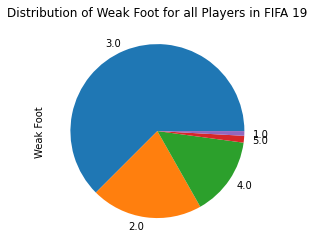

In [176]:
filtered_df = df[df['Weak Foot'].notnull()]
values = filtered_df['Weak Foot'].value_counts()
values.plot(kind='pie', title='Distribution of Weak Foot for all Players in FIFA 19')

### 1.4 

Create **a boxplot and a violin plot** for distributions of players' ages in different positions (similar to plots on page 92 of Lecture 1 slide) Get rid of players whose position = nan. **Ensure the axes are labeled properly**

Text(0, 0.5, 'Age')

<Figure size 432x288 with 0 Axes>

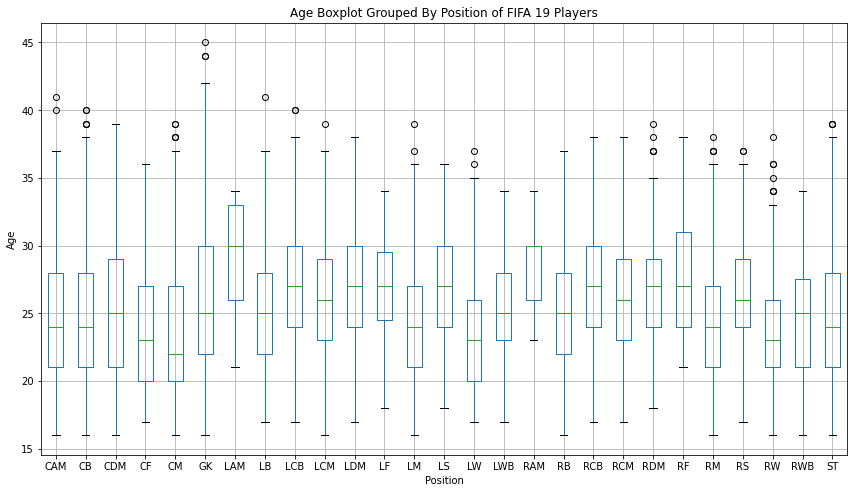

In [177]:
plt.figure()
fig, ax = plt.subplots(figsize=(14,8))
#ax.boxplot(df['Age'])
filtered_df = df[df['Position'].notnull()]
filtered_df.boxplot(column=['Age'], by='Position', ax=ax)
plt.suptitle('')
plt.title('Age Boxplot Grouped By Position of FIFA 19 Players')
plt.ylabel('Age')

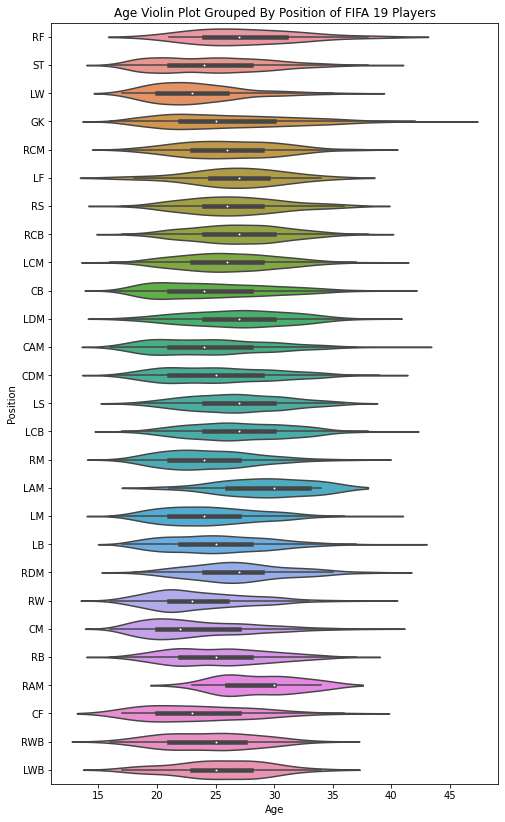

In [178]:
#plt.figure()
fig, axes = plt.subplots(figsize=(8,14))
filtered_df = df[df['Position'].notnull()]
sns.violinplot(x='Age', y='Position', data=filtered_df, ax = axes)
axes.set_title('Age Violin Plot Grouped By Position of FIFA 19 Players')
plt.show()

### 1.5
Creat a **stacked bar plot** for proportions of international reputation vs. players' ages (similar to the plot on page 97 of lecture 1 slide). **Ensure the axes and bars are labeled properly**

Note that international reputation takes value from [1,2,3,4,5]. Get rid of players whose international reputation is nan. 

Ages should be treated as intervals with width 5, i.e. the x-axis labels should be: 16 to 20, 21 to 25, 26 to 30,..., 41 to 45 

<Figure size 432x288 with 0 Axes>

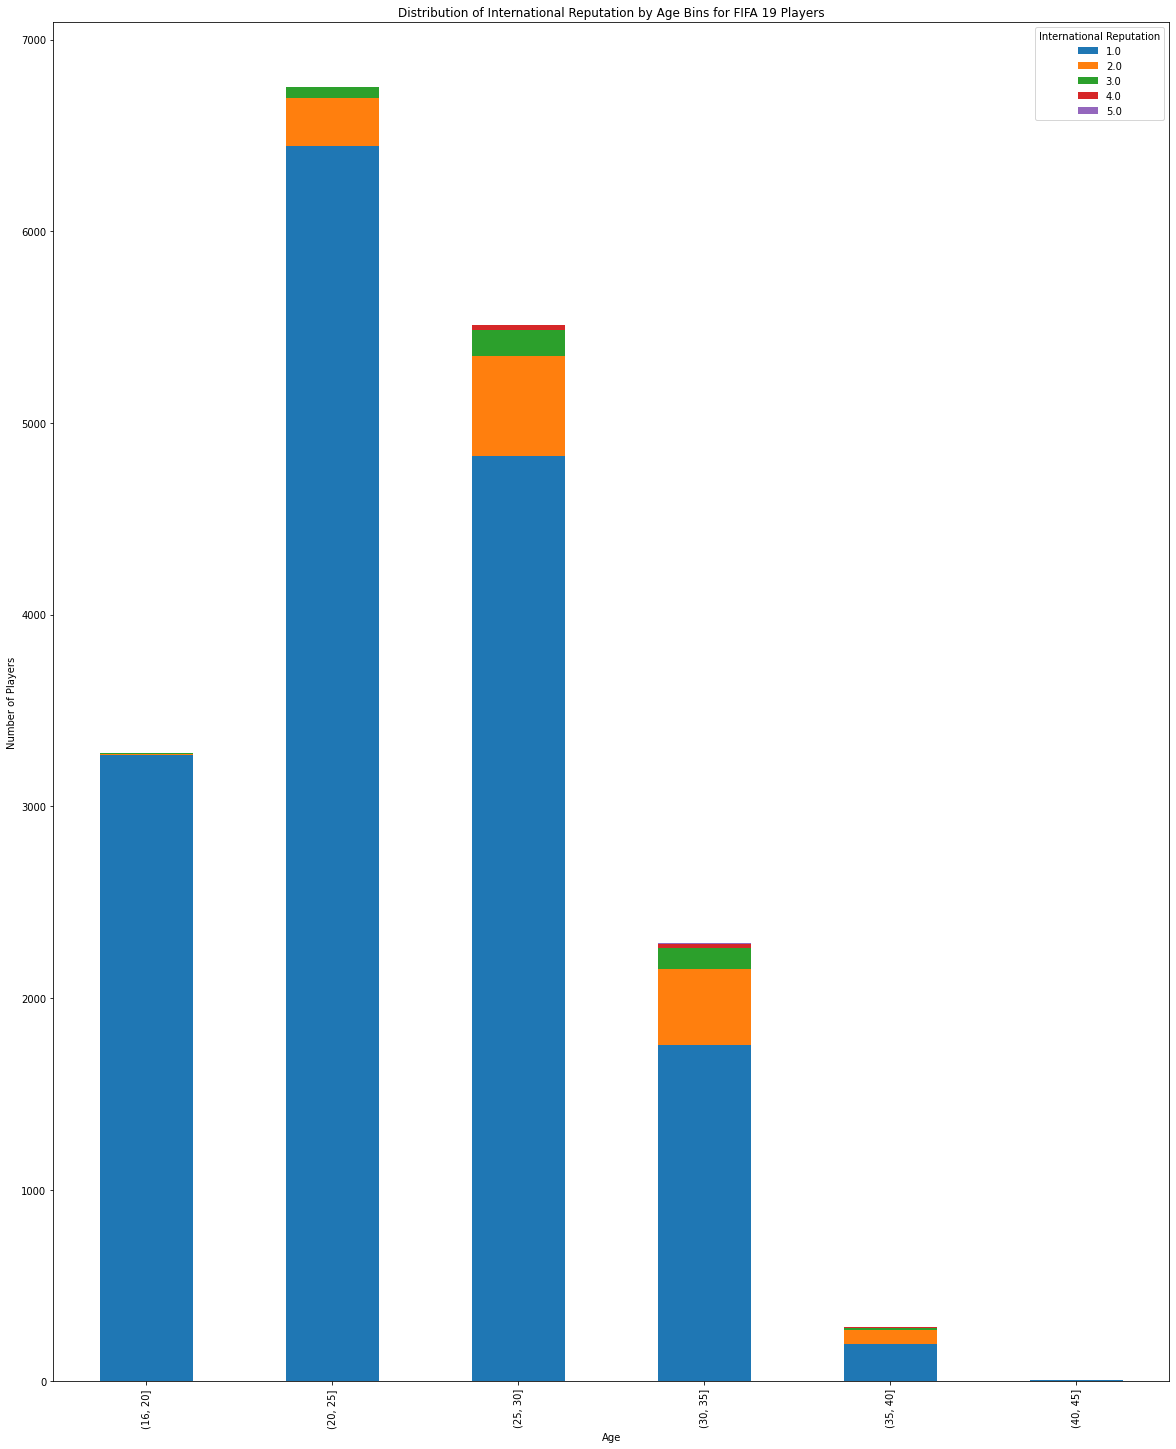

In [179]:
plt.figure()
#filter
bins = [16, 20, 25, 30, 35, 40, 45]
df.groupby([pd.cut(df['Age'], bins), 'International Reputation']).size().unstack().plot(kind='bar',stacked=True, figsize=(20,25))
#df.groupby(['Age', 'International Reputation']).size().unstack().plot(kind='bar',stacked=True)
plt.ylabel('Number of Players')
plt.title('Distribution of International Reputation by Age Bins for FIFA 19 Players')
plt.show()

## Task 2: Data Preprocessing and Supervised Learning

Use the dataset_credit.csv for this task. The target variable is 'class'.

### 2.1

Load the data and understand the data distributions - pick a few features and plot their distributions.


<Figure size 432x288 with 0 Axes>

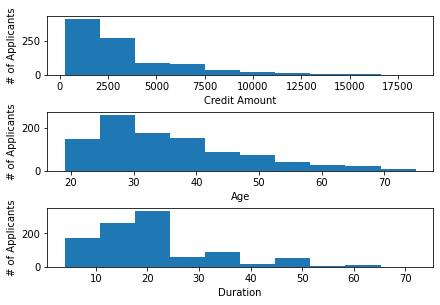

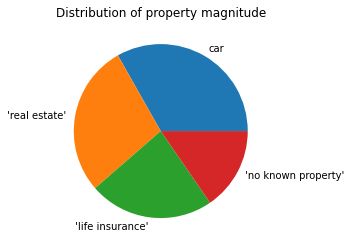

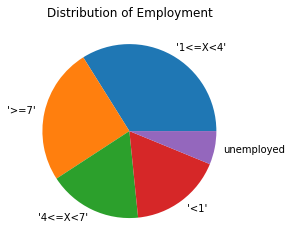

<AxesSubplot:title={'center':'Distribution of savings_status'}>

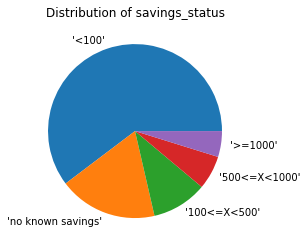

In [180]:
PATH_TO_DATASET = './dataset_credit.csv' 
############################################################

df_credit = pd.read_csv(PATH_TO_DATASET)
df_credit.head()
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(3, constrained_layout=True)
ax1.hist(df_credit['credit_amount'])
ax2.hist(df_credit['age'])
ax3.hist(df_credit['duration'])
ax1.set(xlabel='Credit Amount', ylabel='# of Applicants')
ax2.set(xlabel='Age', ylabel='# of Applicants')
ax3.set(xlabel='Duration', ylabel='# of Applicants')
plt.show()
plt.figure()
values = df_credit['property_magnitude'].value_counts()
values.plot(kind='pie', title='Distribution of property magnitude', ylabel='')
plt.show()
plt.figure()
values = df_credit['employment'].value_counts()
values.plot(kind='pie', title='Distribution of Employment', ylabel='')
plt.show()
plt.figure()
values = df_credit['savings_status'].value_counts()
values.plot(kind='pie', title='Distribution of savings_status', ylabel='')

### 2.2

**Preprocessing** - does any feature need pre-processing? Would you do any scaling to numerical features? Are there any categorical features? How would you handle the categorical features? Are there any features that has missing values? What % of values are missing in each of the features? Based on this percentages, would you consider dropping any features? How about adding a missing indicator? Would you consider adding a missing indicator column?

In [181]:
#missing values (work for Q's 5)
print(df_credit['duration'].isna().sum())
print(df_credit['credit_amount'].isna().sum())
print(df_credit['employment'].isna().sum())
print(df_credit['property_magnitude'].isna().sum())
print(df_credit['age'].isna().sum())
print(df_credit['own_telephone'].isna().sum())
print(df_credit['class'].isna().sum()) 
print(len(df_credit))

#PCT missing values (work for Q6)
print(df_credit['credit_amount'].isna().sum() / len(df_credit))
print(df_credit['own_telephone'].isna().sum() / len(df_credit))

0
74
0
0
0
759
0
1000
0.074
0.759


In [182]:
#1.Does any feature need pre-processing? 

#ANSWER: YES! Almost every feature in this dataset needs preprocessing

#2. Would you do any scaling to numerical features? 

#ANSWER: Yes, since we are doing K-NN as our model type, this is sensitive to different unit scales for different features.
#We would most likely want to scale duration, age, and credit amount with the standardScaler. If we didn't 
#Features with large ranges of values like credit amount would have an outsized impact on the K-NN model estimate.

#3. Are there any categorical features? 

#ANSWER: Yes, property_magnitude (Categorical Unordered), as well as savings_status (Categorial Ordered) and 
# employment (Categorical Ordered) and own telephone (Categorical Unordered)

#4. How would you handle the categorical features? 

#ANSWER: We will do Ordinal Encoding for employment, savings_status since these are categorical ordered, and one hot encoding
#for property magnitude

#5. Are there any features that have missing values?

print(df_credit['duration'].isna().sum())
print(df_credit['credit_amount'].isna().sum())
print(df_credit['employment'].isna().sum())
print(df_credit['property_magnitude'].isna().sum())
print(df_credit['age'].isna().sum())
print(df_credit['own_telephone'].isna().sum())
print(df_credit['class'].isna().sum()) 
print(len(df_credit))

#ANSWER: own_telephone and credit_amount have missing values

#6. What % of values are missing in each of the features?

print(df_credit['credit_amount'].isna().sum() / len(df_credit))
print(df_credit['own_telephone'].isna().sum() / len(df_credit))

#ANSWER: 7.4% and 75.9% of values are missing for credit_amount and own_telephone, respectively.

#7. Based on these percentages, would you consider dropping any features? 

#ANSWER: Yes, I would likely drop own_telephone
#For the 7.4% of the missing_credit, I would consider dropping these individual rows, or giving them 
#the median value.

#8. How about adding a missing indicator? Would you consider adding a missing indicator column? 

#ANSWER: Yes I would consider adding a missing indicator for the own_telephone column since there are lots of data points 
#missing this value, and that could be informative. However, I think for this test case I will drop this column

#Preprocessing - Drop rows with missing values for credit_amount
df_credit = df_credit.dropna(subset=['credit_amount'])
df_credit.drop(['own_telephone'], axis=1, inplace=True)

#Preprocessing - ordinal encoding employment, saving status
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories = [["'no known savings'", "'<100'", "'100<=X<500'", "'500<=X<1000'", "'>=1000'"]])
df_credit["savings_status_mapped"] = enc.fit_transform(df_credit["savings_status"].to_numpy().reshape(-1,1))
df_credit.head(50)

enc = OrdinalEncoder(categories = [["unemployed", "'<1'", "'1<=X<4'", "'4<=X<7'", "'>=7'"]])
df_credit["employment_mapped"] = enc.fit_transform(df_credit["employment"].to_numpy().reshape(-1,1))
df_credit.head(50)

#Preprocessing - One hot encoding for property_magnitude
df_credit_property = pd.get_dummies(df_credit['property_magnitude'], dummy_na=False)

#Drop preprocessed columns
df_credit.drop(['savings_status','employment', 'property_magnitude'], axis=1, inplace=True)
df_credit = df_credit.join(df_credit_property)

#Preprocessing - scaling numerical
#We need to wait to do this until we split into test/development/train
#but will use standardScaler on 'age','duration',and 'credit_amount'


0
74
0
0
0
759
0
1000
0.074
0.759


### 2.3

**Data splitting** - Create development & test datasets.

In [183]:
from sklearn.model_selection import train_test_split

df_credit_unlabeled = df_credit.drop('class', 1)
X_dev, X_test, y_dev, y_test = train_test_split(df_credit_unlabeled, df_credit['class'],random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, random_state=0)


Give a reason on why did you use the particular splitting strategy.

Answer: The stratified splitting is what we used here with the default 3:1 from sklearn. I thought stratified splitting is good in this case because we want to preserve the relative frequencies of the two classes (good/bad) 7:3. 

### 2.4

**Model selection** - Lets use k-nearest neighbors to train a model. Pick 2 out of 4 model selection strategies discussed in class to compare the optimal k chosen from both the methods. Also compare the results from grid search v.s. random search for finding the optimal k.

In [184]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import random

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)
X_test_scaled = ss.transform(X_test)
X_dev_scaled = ss.fit_transform(X_dev)
neighbors = np.arange(1,30, 2)
random_neighbors = np.arange(1,30,1)
random.Random(0).shuffle(random_neighbors)

# import warnings filter
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


#Grid Search with K-fold CV
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
params = {'kneighborsclassifier__n_neighbors':neighbors}
grid = GridSearchCV(pipe, params, cv=10)
grid.fit(X_dev, y_dev)
print(f'Grid Search with K-fold - Best cross validation score: {grid.best_score_:.3f}')
best_k_k = grid.best_params_['kneighborsclassifier__n_neighbors']
print("Grid Search with K-fold CV - Best number of neighbors:", best_k_k)


#Grid Search with three-way holdout
val_scores = []
for idx in neighbors:
    knn = KNeighborsClassifier(n_neighbors=idx)
    knn.fit(X_train_scaled, y_train)
    val_scores.append(knn.score(X_val_scaled, y_val))
print(f"Grid Search with three-way holdout - Best cross validation score: {np.max(val_scores):.3f}")
best_n_neighbors = neighbors[np.argmax(val_scores)]
print("Grid Search with three-way holdout - Best number of neighbors:", best_n_neighbors)

#Random Seach with three-way holdout 
val_scores_random = []
for idx in random_neighbors[:10]:
    knn = KNeighborsClassifier(n_neighbors=idx)
    knn.fit(X_train_scaled, y_train)
    val_scores_random.append(knn.score(X_val_scaled, y_val))
print(f"Random Search with three-way holdout - Best cross validation score: {np.max(val_scores_random):.3f}")
best_n_neighbors_r = random_neighbors[np.argmax(val_scores_random)]
print("Random Search with three-way holdout - Best number of neighbors:", best_n_neighbors_r)

#Random Seach with K-Fold CV
pipe = make_pipeline(StandardScaler(),KNeighborsClassifier())
params = {'kneighborsclassifier__n_neighbors': random_neighbors[:10]}
grid = RandomizedSearchCV(pipe,params,cv=10,n_iter=5,random_state=0)
grid.fit(X_dev, y_dev)
print(f'Random Search with K-fold - Best cross validation score: {grid.best_score_:.3f}')
best_k_rf = grid.best_params_['kneighborsclassifier__n_neighbors']
print("Random Search with K-fold CV - Best number of neighbors:", best_k_rf)

Grid Search with K-fold - Best cross validation score: 0.707
Grid Search with K-fold CV - Best number of neighbors: 19
Grid Search with three-way holdout - Best cross validation score: 0.764
Grid Search with three-way holdout - Best number of neighbors: 29
Random Search with three-way holdout - Best cross validation score: 0.736
Random Search with three-way holdout - Best number of neighbors: 23
Random Search with K-fold - Best cross validation score: 0.702
Random Search with K-fold CV - Best number of neighbors: 24


### 2.5

Compare the performance of 4 models (2 model selection strategies & 2 hyperparameter search strategies) on the test set. Which combination performs the best? Any reasons why this combination gives the best performance?


In [185]:
#GridSeachThreeWayHoldout
knn_g_three = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn_g_three.fit(X_dev_scaled, y_dev)
print("GridSeachThreeWayHoldout score on test data: ",knn_g_three.score(X_test_scaled, y_test))
#GridSearchKFold
knn_g_k = KNeighborsClassifier(n_neighbors=best_k_k)
knn_g_k.fit(X_dev_scaled, y_dev)
print("GridSearchKFold score on test data: ", knn_g_k.score(X_test_scaled, y_test))
#RandomSearchThreeWayHoldout
knn_r_three = KNeighborsClassifier(n_neighbors=best_n_neighbors_r)
knn_r_three.fit(X_dev_scaled, y_dev)
print("RandomSearchThreeWayHoldout score on test data: ", knn_r_three.score(X_test_scaled, y_test))
#RandomSearchKFold
knn_r_k = KNeighborsClassifier(n_neighbors=best_k_rf)
knn_r_k.fit(X_dev_scaled, y_dev)
print("RandomSearchKFold score on test data: ", knn_r_k.score(X_test_scaled, y_test))

GridSeachThreeWayHoldout score on test data:  0.728448275862069
GridSearchKFold score on test data:  0.75
RandomSearchThreeWayHoldout score on test data:  0.75
RandomSearchKFold score on test data:  0.7413793103448276


In [186]:
#For me, the RandomSearchThreeWayHoldout and GridSeachKFold performed the best (tied) with .75 accuracy on test data.
#The difference between these two and the GridSearchThreeWayHoldout and RandomSearchKFold is very very small though. 
#One possible reason that all are similar is that the relative range of neighbors is all w/in 10 (19-29). So Random
#Seach and grid search yielded roughly the same results, since there was not a large area to search over.
#As for kFold vs ThreeWayHoldOut, I think the dataset was too small for there to be that many meaningful differences
#in performance compared with KFold.